<img src="https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png" align="left" height=100 width=200>

🚀 [**`Kaggle - Shelter Animal Outcomes`**](https://www.kaggle.com/competitions/shelter-animal-outcomes) 🚀

# 📚 Libraries

In [1]:
# DATA MANIPULTION 
import pandas as pd 
import numpy as np
import gzip

# DATA VIZ
import matplotlib.pyplot as plt
import seaborn as sns

# STATS
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

# MACHINE LEARNING
## PREPROCESSING
from sklearn.impute import SimpleImputer, KNNImputer
## MODEL SELECTION
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict
## SCALERS
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
## CLASSIFICATION MODELS
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier, PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

## EVALUATION
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_curve
## MODEL TUNING
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn import set_config; set_config(display="diagram")  

#  🐈 Dataset

In [2]:
data_train = pd.read_csv('train.csv')
data_train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [3]:
data_test = pd.read_csv('test.csv')
data_test.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


In [4]:
print(f'The shape of the data_train dataset is: {data_train.shape}')
print(f'The shape of the data_test dataset is: {data_test.shape}')

The shape of the data_train dataset is: (26729, 10)
The shape of the data_test dataset is: (11456, 8)


In [5]:
print(data_train.dtypes.value_counts())
print('--'*50)
print(data_test.dtypes.value_counts())

object    10
dtype: int64
----------------------------------------------------------------------------------------------------
object    7
int64     1
dtype: int64


# 📊 Data visualisation/analysis

🐈‍⬛ Let's see the types of animals in the dataset

/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AnimalType', ylabel='count'>

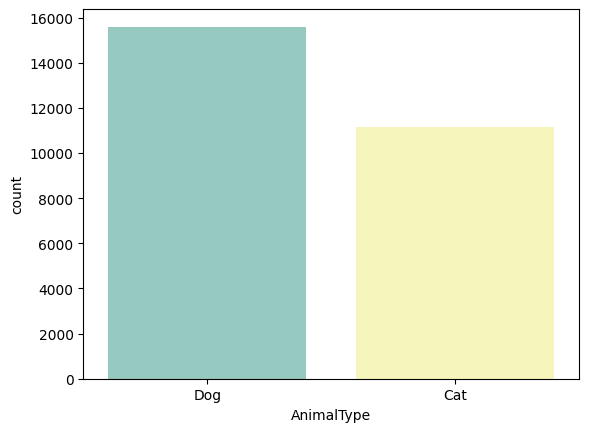

In [6]:
sns.countplot(data_train.AnimalType, palette='Set3')

🐈 What is the distribution of the outcomes for the animals?

/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OutcomeType', ylabel='count'>

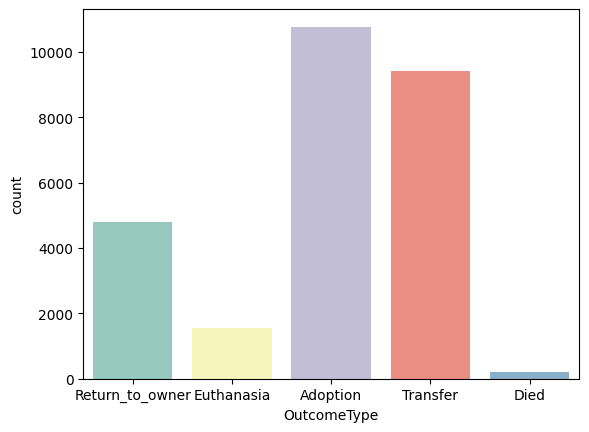

In [7]:
sns.countplot(data_train.OutcomeType, palette='Set3')

The vast majority of animals are getting either adopted or transfered

Another column interesting to show would be SexuponOutcome

/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SexuponOutcome', ylabel='count'>

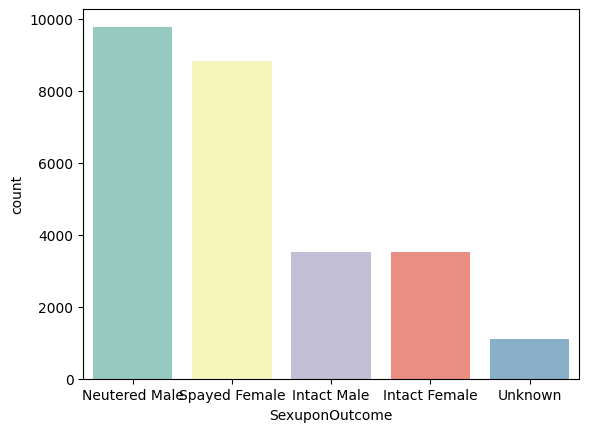

In [8]:
sns.countplot(data_train.SexuponOutcome, palette='Set3')

In this plot, we see two informations displayed: whether the animal is a male/female, and if it has been spayed/neutered or not<br />
The other columns are not that meaningful to plot

We can then divide this column into multiple ones

In [9]:
def get_sex(x):
    x = str(x)
    if x.find('Male') >= 0: return 'Male'
    if x.find('Female') >= 0: return 'Female'
    return 'Unknown'
def get_neutered(x):
    x = str(x)
    if x.find('Neutered') >= 0: return 'Neutered'
    if x.find('Spayed') >= 0: return 'Spayed'
    if x.find('Intact') >= 0: return 'Intact'
    return 'Unknown'

In [10]:
data_train['Sex'] = data_train.SexuponOutcome.apply(get_sex)
data_train['Neutered'] = data_train.SexuponOutcome.apply(get_neutered)
data_test['Sex'] = data_test.SexuponOutcome.apply(get_sex)
data_test['Neutered'] = data_test.SexuponOutcome.apply(get_neutered)

In [11]:
data_train.drop('SexuponOutcome', axis=1, inplace=True)
data_test.drop('SexuponOutcome', axis=1, inplace=True)

In [12]:
print(f"The proportion of Female is: {(data_train['Sex']=='Female').sum()/len(data_train)}")
print(f"The proportion of Male is: {(data_train['Sex']=='Male').sum()/len(data_train)}")

The proportion of Female is: 0.46133413146769425
The proportion of Male is: 0.4977365408357963


The column 'Breed' gives indication on the animal too: whether that animal is pure race or mixed

In [13]:
def get_mix(x):
    x=str(x)
    if x.find('Mix') >= 0: return 'Mix'
    return 'Not'
data_train['Breed'] = data_train.Breed.apply(get_mix)
data_test['Breed'] = data_test.Breed.apply(get_mix)

/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Breed', ylabel='count'>

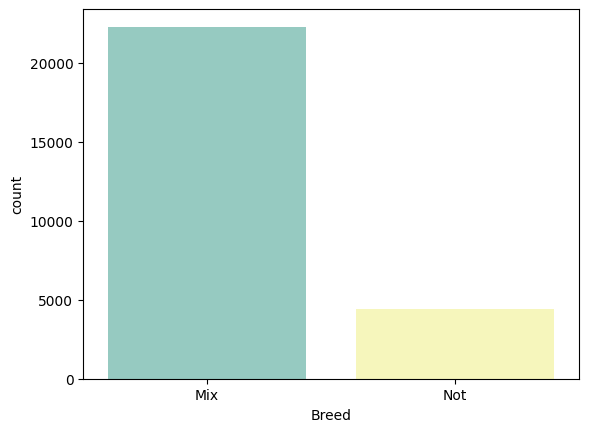

In [14]:
sns.countplot(data_train.Breed, palette='Set3')

We can see the mix are a much larger part of the shelter animals

But how much do these parameters influence the outcome?

<AxesSubplot:xlabel='Sex', ylabel='count'>

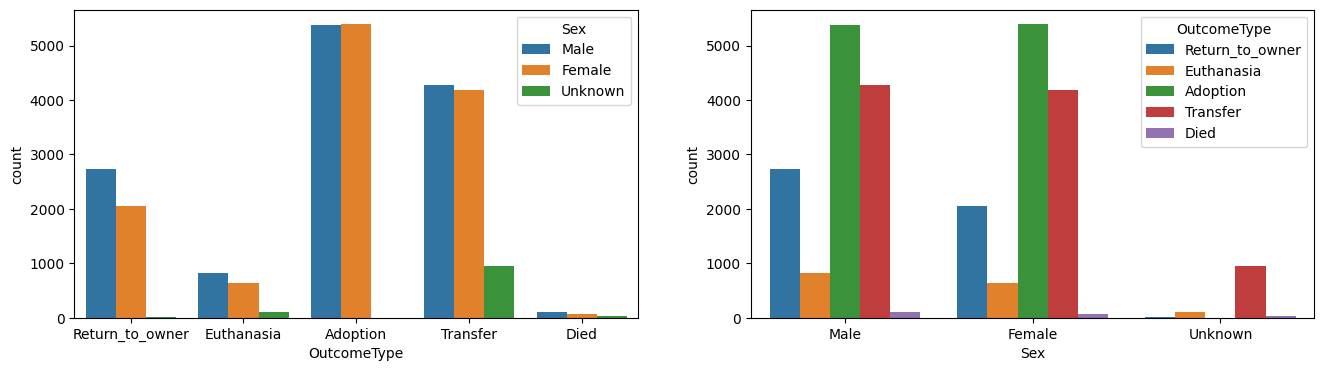

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=data_train, x='OutcomeType',hue='Sex', ax=ax1)
sns.countplot(data=data_train, x='Sex',hue='OutcomeType', ax=ax2)

We can see that the sex of the animal does not really matter in the outcome

<AxesSubplot:xlabel='AnimalType', ylabel='count'>

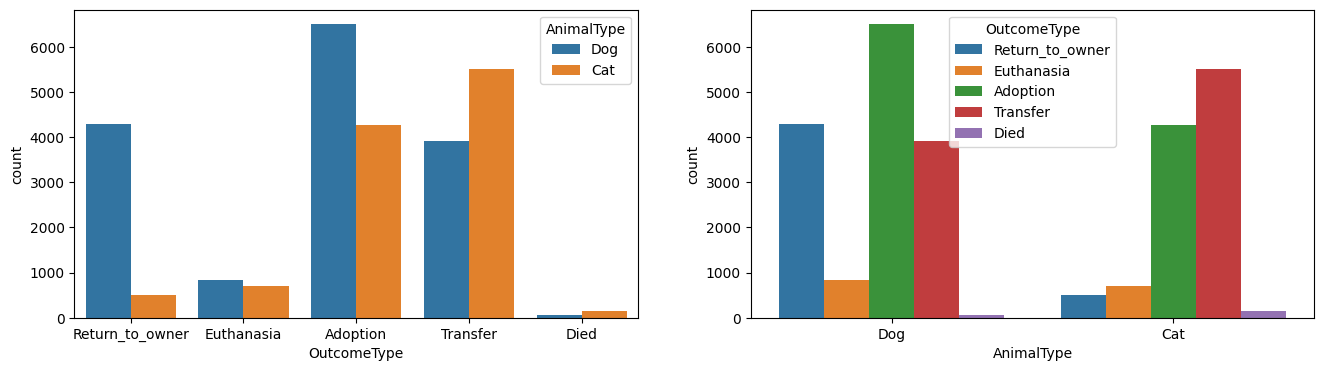

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=data_train, x='OutcomeType',hue='AnimalType', ax=ax1)
sns.countplot(data=data_train, x='AnimalType',hue='OutcomeType', ax=ax2)

However, the type of the animal does: dogs are most likely to be adopted or returned to its owner while cats are most likely to be transfered

<AxesSubplot:xlabel='Breed', ylabel='count'>

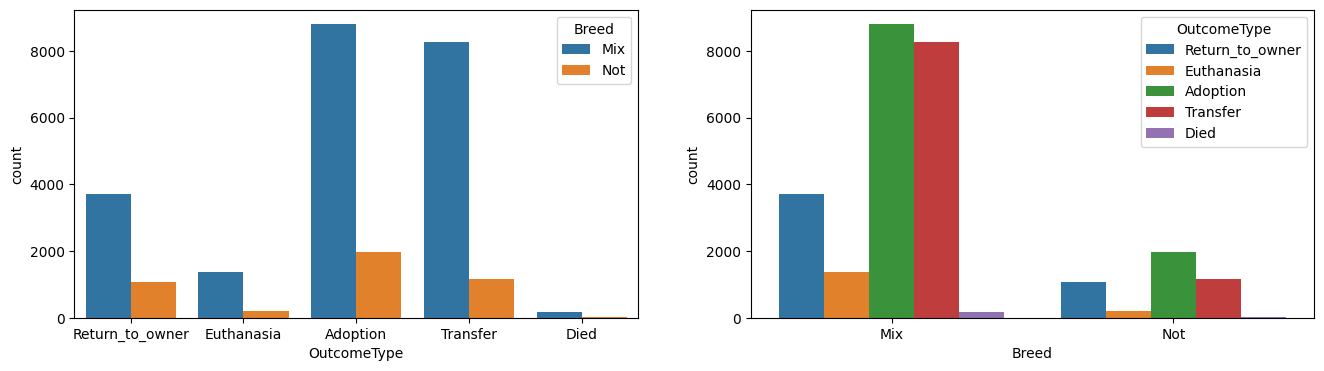

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=data_train, x='OutcomeType',hue='Breed', ax=ax1)
sns.countplot(data=data_train, x='Breed',hue='OutcomeType', ax=ax2)

The breed does not play a significant part in the process even with the disparities in the graphs, the proportions are already very different from the start

<AxesSubplot:xlabel='Neutered', ylabel='count'>

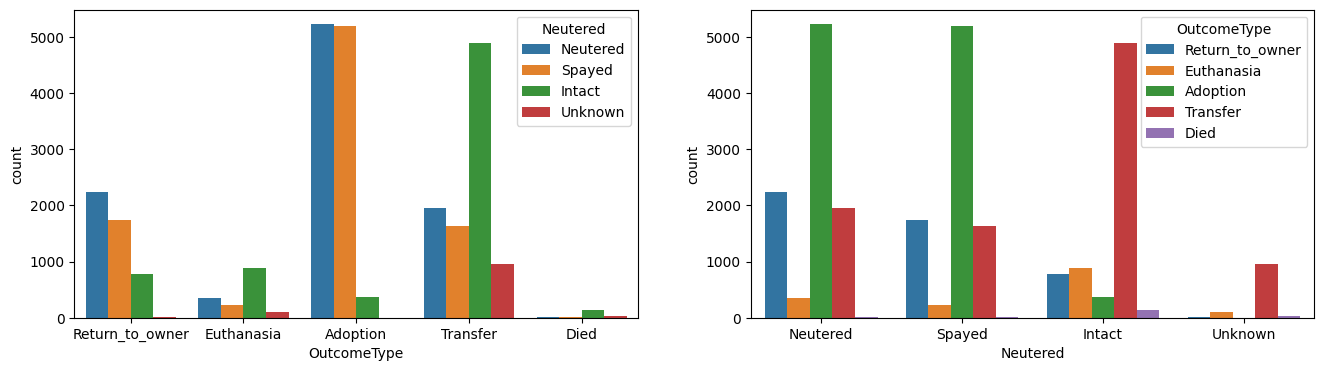

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=data_train, x='OutcomeType',hue='Neutered', ax=ax1)
sns.countplot(data=data_train, x='Neutered',hue='OutcomeType', ax=ax2)

Last but not least: animals left intact are much higher chances of being either euthanised or transfered

# 🏛️ Classification model

In [19]:
data_train

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,AgeuponOutcome,Breed,Color,Sex,Neutered
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,1 year,Mix,Brown/White,Male,Neutered
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,1 year,Mix,Cream Tabby,Female,Spayed
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,2 years,Mix,Blue/White,Male,Neutered
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,3 weeks,Mix,Blue Cream,Male,Intact
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,2 years,Not,Tan,Male,Neutered
...,...,...,...,...,...,...,...,...,...,...,...
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,1 month,Mix,Brown Tabby/White,Male,Intact
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,3 months,Mix,Brown Tabby,Female,Spayed
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,4 years,Mix,White/Tan,Male,Neutered
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,4 weeks,Mix,Black,Male,Intact


## ⌚ Convert DateTime to numerical features

In [20]:
train_time = pd.to_datetime(data_train['DateTime'])
test_time = pd.to_datetime(data_test['DateTime'])

In [21]:
data_train['Year'] = train_time.dt.year
data_train['Month'] = train_time.dt.month
data_train['Day'] = train_time.dt.day
data_train['Hour'] = train_time.dt.hour
data_train['Minute'] = train_time.dt.minute
data_train.drop('DateTime', axis=1, inplace=True)

In [22]:
data_test['Year'] = test_time.dt.year
data_test['Month'] = test_time.dt.month
data_test['Day'] = test_time.dt.day
data_test['Hour'] = test_time.dt.hour
data_test['Minute'] = test_time.dt.minute
data_test.drop('DateTime', axis=1, inplace=True)

In [23]:
data_test

,ID,Name,AnimalType,AgeuponOutcome,Breed,Color,Sex,Neutered,Year,Month,Day,Hour,Minute
0,1,Summer,Dog,10 months,Mix,Red/White,Female,Intact,2015,10,12,12,15
1,2,Cheyenne,Dog,2 years,Not,Black/Tan,Female,Spayed,2014,7,26,17,59
2,3,Gus,Cat,1 year,Mix,Brown Tabby,Male,Neutered,2016,1,13,12,20
3,4,Pongo,Dog,4 months,Mix,Tricolor,Male,Intact,2013,12,28,18,12
4,5,Skooter,Dog,2 years,Mix,White,Male,Neutered,2015,9,24,17,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11451,11452,NaN,Cat,2 months,Mix,Black,Male,Neutered,2014,7,8,14,50
11452,11453,NaN,Cat,2 weeks,Mix,Blue,Female,Intact,2014,10,21,12,57
11453,11454,NaN,Cat,1 year,Mix,Calico,Female,Intact,2014,9,29,9,0
11454,11455,Rambo,Dog,6 years,Mix,Black/Tan,Male,Neutered,2015,9,5,17,16


## 📅 Convert AgeuponOutcome to numerical feature

In [24]:
data_train['AgeuponOutcome'].fillna('1 month', inplace=True)
data_test['AgeuponOutcome'].fillna('1 month', inplace=True)

In [25]:
def get_age(x):
    try:
        age_list = x.split()
    except:
        return None
    ages = int(age_list[0])
    if(age_list[1].find("s")):
        age_list[1] = age_list[1].replace("s","")
    if age_list[1] == "day":
        return ages
    elif (age_list[1] == "week"):
        return ages*7
    elif (age_list[1] == "month"):
        return ages*30
    elif (age_list[1] == "year"):
        return ages*365
data_train['Age_in_days'] = data_train.AgeuponOutcome.apply(get_age)
data_test['Age_in_days'] = data_test.AgeuponOutcome.apply(get_age)

In [26]:
data_train.drop(columns=['AgeuponOutcome'], inplace=True)
data_test.drop(columns=['AgeuponOutcome'], inplace=True)

In [27]:
data_train

,AnimalID,Name,OutcomeType,OutcomeSubtype,AnimalType,Breed,Color,Sex,Neutered,Year,Month,Day,Hour,Minute,Age_in_days
0,A671945,Hambone,Return_to_owner,NaN,Dog,Mix,Brown/White,Male,Neutered,2014,2,12,18,22,365
1,A656520,Emily,Euthanasia,Suffering,Cat,Mix,Cream Tabby,Female,Spayed,2013,10,13,12,44,365
2,A686464,Pearce,Adoption,Foster,Dog,Mix,Blue/White,Male,Neutered,2015,1,31,12,28,730
3,A683430,NaN,Transfer,Partner,Cat,Mix,Blue Cream,Male,Intact,2014,7,11,19,9,21
4,A667013,NaN,Transfer,Partner,Dog,Not,Tan,Male,Neutered,2013,11,15,12,52,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26724,A702446,NaN,Transfer,Partner,Cat,Mix,Brown Tabby/White,Male,Intact,2015,5,14,11,56,30
26725,A718934,NaN,Transfer,SCRP,Cat,Mix,Brown Tabby,Female,Spayed,2016,1,20,18,59,90
26726,A698128,Zeus,Adoption,NaN,Dog,Mix,White/Tan,Male,Neutered,2015,3,9,13,33,1460
26727,A677478,NaN,Transfer,Partner,Cat,Mix,Black,Male,Intact,2014,4,27,12,22,28


## 🌈 Convert the color to reduce the length of the feature

In [28]:
def get_color(x):
    try:
        color = x.split()
    except:
        return 'Unknown'
    return str(color[0])

data_train['Color'] = data_train['Color'].apply(get_color)
data_test['Color'] = data_test['Color'].apply(get_color)

In [29]:
data_train

,AnimalID,Name,OutcomeType,OutcomeSubtype,AnimalType,Breed,Color,Sex,Neutered,Year,Month,Day,Hour,Minute,Age_in_days
0,A671945,Hambone,Return_to_owner,NaN,Dog,Mix,Brown/White,Male,Neutered,2014,2,12,18,22,365
1,A656520,Emily,Euthanasia,Suffering,Cat,Mix,Cream,Female,Spayed,2013,10,13,12,44,365
2,A686464,Pearce,Adoption,Foster,Dog,Mix,Blue/White,Male,Neutered,2015,1,31,12,28,730
3,A683430,NaN,Transfer,Partner,Cat,Mix,Blue,Male,Intact,2014,7,11,19,9,21
4,A667013,NaN,Transfer,Partner,Dog,Not,Tan,Male,Neutered,2013,11,15,12,52,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26724,A702446,NaN,Transfer,Partner,Cat,Mix,Brown,Male,Intact,2015,5,14,11,56,30
26725,A718934,NaN,Transfer,SCRP,Cat,Mix,Brown,Female,Spayed,2016,1,20,18,59,90
26726,A698128,Zeus,Adoption,NaN,Dog,Mix,White/Tan,Male,Neutered,2015,3,9,13,33,1460
26727,A677478,NaN,Transfer,Partner,Cat,Mix,Black,Male,Intact,2014,4,27,12,22,28


## 🔠 Convert the Name into has or hasn't

In [30]:
def has_name(x):
    if type(x) is str:
        return 1
    return 0
data_train['Name'] = data_train['Name'].apply(has_name)
data_test['Name'] = data_test['Name'].apply(has_name)

In [31]:
data_train

,AnimalID,Name,OutcomeType,OutcomeSubtype,AnimalType,Breed,Color,Sex,Neutered,Year,Month,Day,Hour,Minute,Age_in_days
0,A671945,1,Return_to_owner,NaN,Dog,Mix,Brown/White,Male,Neutered,2014,2,12,18,22,365
1,A656520,1,Euthanasia,Suffering,Cat,Mix,Cream,Female,Spayed,2013,10,13,12,44,365
2,A686464,1,Adoption,Foster,Dog,Mix,Blue/White,Male,Neutered,2015,1,31,12,28,730
3,A683430,0,Transfer,Partner,Cat,Mix,Blue,Male,Intact,2014,7,11,19,9,21
4,A667013,0,Transfer,Partner,Dog,Not,Tan,Male,Neutered,2013,11,15,12,52,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26724,A702446,0,Transfer,Partner,Cat,Mix,Brown,Male,Intact,2015,5,14,11,56,30
26725,A718934,0,Transfer,SCRP,Cat,Mix,Brown,Female,Spayed,2016,1,20,18,59,90
26726,A698128,1,Adoption,NaN,Dog,Mix,White/Tan,Male,Neutered,2015,3,9,13,33,1460
26727,A677478,0,Transfer,Partner,Cat,Mix,Black,Male,Intact,2014,4,27,12,22,28


## 🫳 Drop useless columns

In [32]:
data_train.drop('AnimalID', axis=1, inplace=True)
data_train.drop('OutcomeSubtype', axis=1, inplace=True)

In [33]:
data_test.drop('ID', axis=1, inplace=True)

In [34]:
data_test

,Name,AnimalType,Breed,Color,Sex,Neutered,Year,Month,Day,Hour,Minute,Age_in_days
0,1,Dog,Mix,Red/White,Female,Intact,2015,10,12,12,15,300
1,1,Dog,Not,Black/Tan,Female,Spayed,2014,7,26,17,59,730
2,1,Cat,Mix,Brown,Male,Neutered,2016,1,13,12,20,365
3,1,Dog,Mix,Tricolor,Male,Intact,2013,12,28,18,12,120
4,1,Dog,Mix,White,Male,Neutered,2015,9,24,17,59,730
...,...,...,...,...,...,...,...,...,...,...,...,...
11451,0,Cat,Mix,Black,Male,Neutered,2014,7,8,14,50,60
11452,0,Cat,Mix,Blue,Female,Intact,2014,10,21,12,57,14
11453,0,Cat,Mix,Calico,Female,Intact,2014,9,29,9,0,365
11454,1,Dog,Mix,Black/Tan,Male,Neutered,2015,9,5,17,16,2190


## 🐈🐕 Separate dataset into two

In [35]:
dog_train = data_train[data_train['AnimalType']=='Dog']
cat_train = data_train[data_train['AnimalType']=='Cat']
dog_test = data_test[data_test['AnimalType']=='Dog']
cat_test = data_test[data_test['AnimalType']=='Cat']

In [36]:
dog_train.reset_index(inplace=True)
cat_train.reset_index(inplace=True)
dog_test.reset_index(inplace=True)
cat_test.reset_index(inplace=True)

In [37]:
dog_train.drop('index', axis=1, inplace=True)
cat_train.drop('index', axis=1, inplace=True)
dog_test.drop('index', axis=1, inplace=True)
cat_test.drop('index', axis=1, inplace=True)

/tmp/ipykernel_5510/658755536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dog_train.drop('index', axis=1, inplace=True)
/tmp/ipykernel_5510/658755536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_train.drop('index', axis=1, inplace=True)
/tmp/ipykernel_5510/658755536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dog_test.drop('index', axis=1, inplace=True)
/tmp/ipykernel_5510/658755536.py:4: SettingWithCopyWarni

In [38]:
dog_train.drop('AnimalType', axis=1, inplace=True)
cat_train.drop('AnimalType', axis=1, inplace=True)
dog_test.drop('AnimalType', axis=1, inplace=True)
cat_test.drop('AnimalType', axis=1, inplace=True)

/tmp/ipykernel_5510/2262915102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dog_train.drop('AnimalType', axis=1, inplace=True)
/tmp/ipykernel_5510/2262915102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_train.drop('AnimalType', axis=1, inplace=True)
/tmp/ipykernel_5510/2262915102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dog_test.drop('AnimalType', axis=1, inplace=True)
/tmp/ipykernel_5510/2262915102.py:4: S

In [39]:
dog_train

,Name,OutcomeType,Breed,Color,Sex,Neutered,Year,Month,Day,Hour,Minute,Age_in_days
0,1,Return_to_owner,Mix,Brown/White,Male,Neutered,2014,2,12,18,22,365
1,1,Adoption,Mix,Blue/White,Male,Neutered,2015,1,31,12,28,730
2,0,Transfer,Not,Tan,Male,Neutered,2013,11,15,12,52,730
3,1,Transfer,Not,Black/Tan,Female,Intact,2014,4,25,13,4,30
4,1,Adoption,Mix,Red/White,Female,Spayed,2014,2,4,17,17,150
...,...,...,...,...,...,...,...,...,...,...,...,...
15590,1,Adoption,Mix,White/Black,Male,Neutered,2015,5,2,21,4,60
15591,1,Return_to_owner,Mix,Black,Female,Spayed,2014,6,30,17,34,3285
15592,0,Adoption,Not,Black/Tricolor,Male,Neutered,2015,4,28,14,26,60
15593,1,Adoption,Mix,Blue/White,Male,Neutered,2016,1,29,18,52,2190


In [40]:
dog_train.dtypes

Name            int64
OutcomeType    object
Breed          object
Color          object
Sex            object
Neutered       object
Year            int64
Month           int64
Day             int64
Hour            int64
Minute          int64
Age_in_days     int64
dtype: object

In [41]:
cat_train.dtypes

Name            int64
OutcomeType    object
Breed          object
Color          object
Sex            object
Neutered       object
Year            int64
Month           int64
Day             int64
Hour            int64
Minute          int64
Age_in_days     int64
dtype: object

In [42]:
y_dog = dog_train['OutcomeType']
dog_train = dog_train.drop(['OutcomeType'], axis=1)
y_cat = cat_train['OutcomeType']
cat_train = cat_train.drop(['OutcomeType'], axis=1)

## 🔢 Numerical features

In [43]:
dog_train_num = dog_train.select_dtypes(exclude='object')
cat_train_num = cat_train.select_dtypes(exclude='object')

In [44]:
dog_test_num = dog_test.select_dtypes(exclude='object')
cat_test_num = cat_test.select_dtypes(exclude='object')

Let's look at the numerical features!

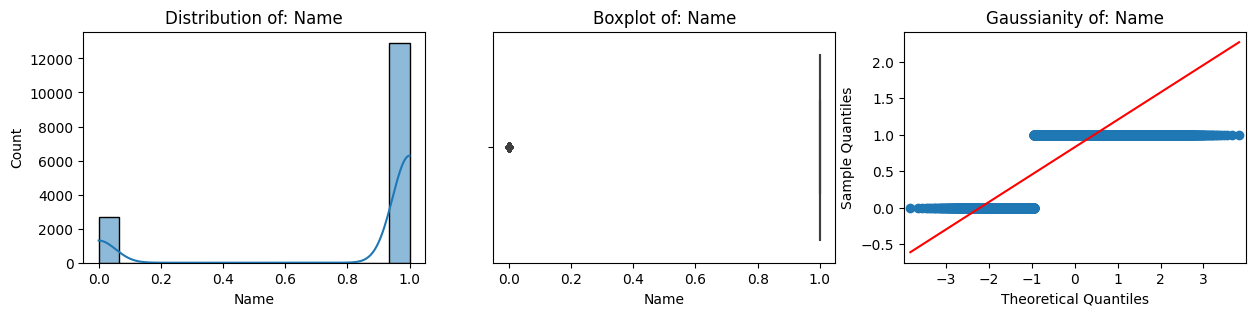

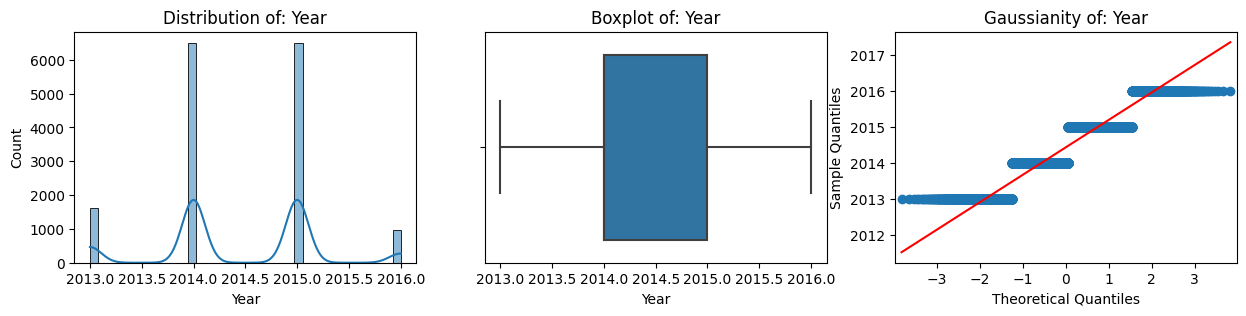

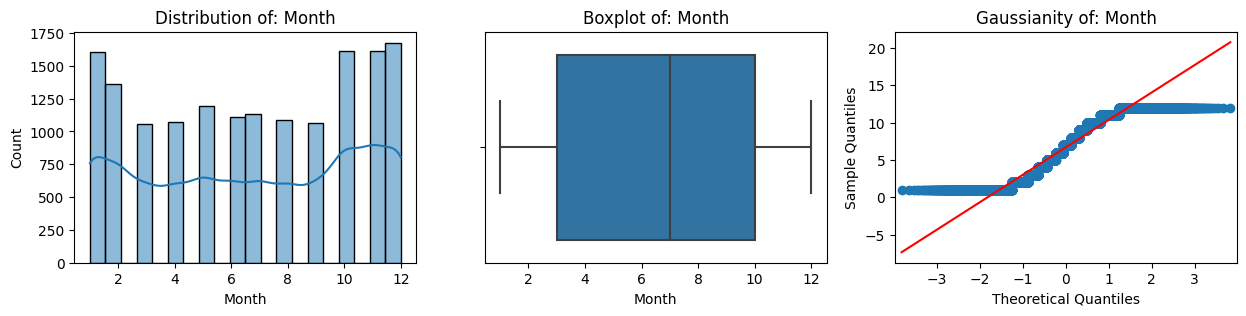

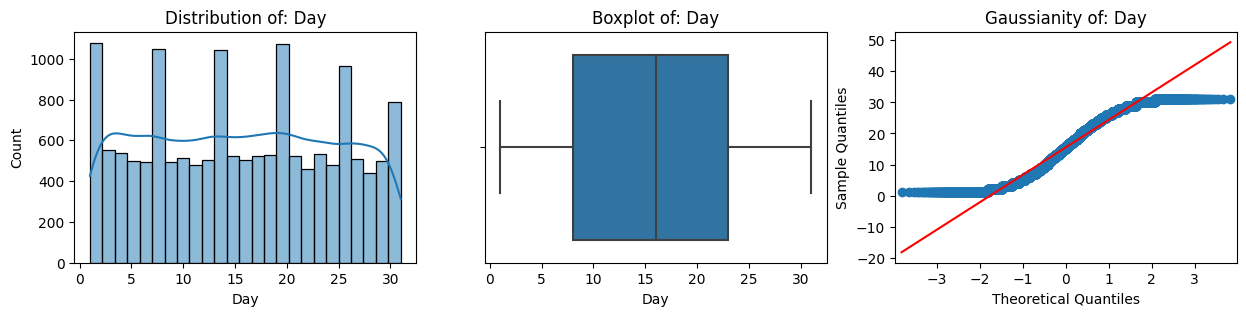

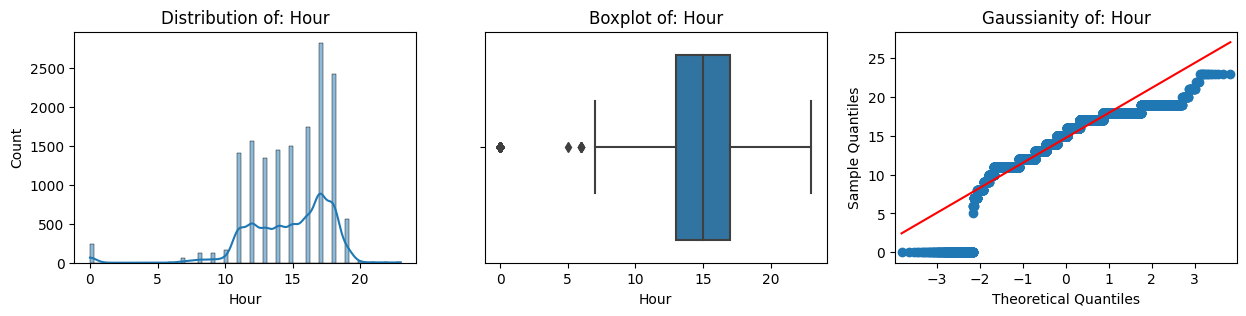

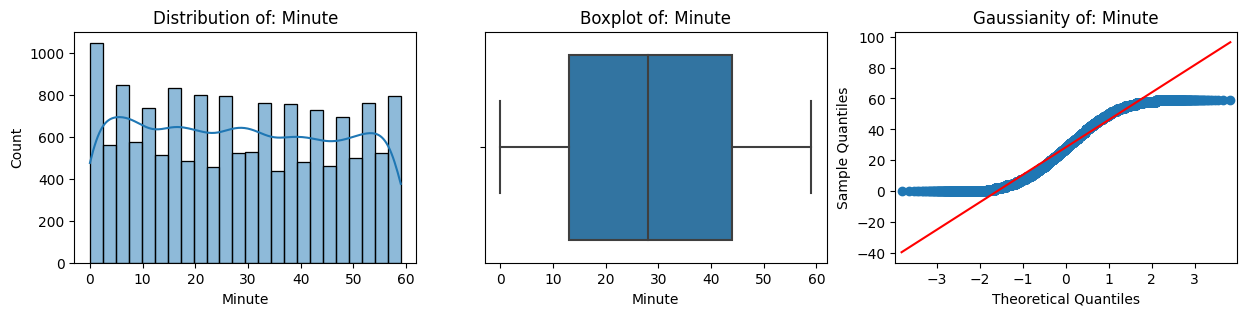

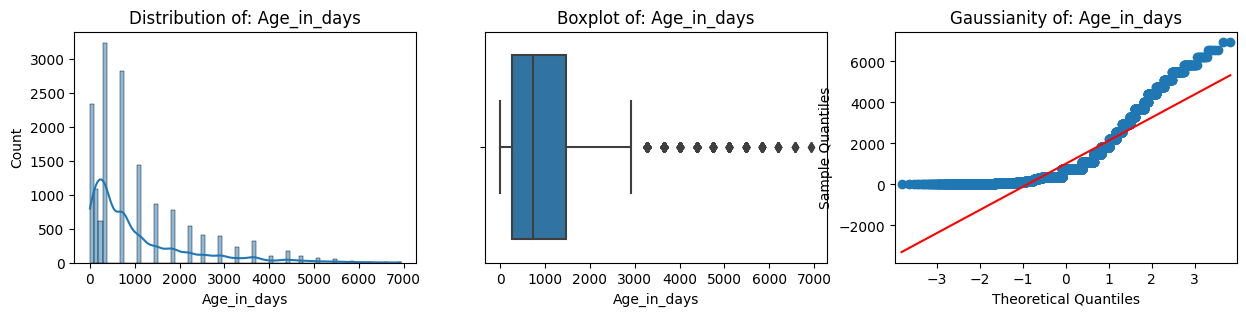

In [45]:
for numerical_feature in dog_train_num.columns:
    
    # Creating three subplots per numerical_feature
    fig, ax =plt.subplots(1,3,figsize=(15,3))
    
    # Histogram to get an overview of the distribution of each numerical_feature
    ax[0].set_title(f"Distribution of: {numerical_feature}")
    sns.histplot(data = dog_train_num, x = numerical_feature, kde=True, ax = ax[0])
    
    # Boxplot to detect outliers
    ax[1].set_title(f"Boxplot of: {numerical_feature}")
    sns.boxplot(data = dog_train_num, x = numerical_feature, ax=ax[1])
    
    # Analyzing whether a feature is normally distributed or not
    ax[2].set_title(f"Gaussianity of: {numerical_feature}")
    qqplot(dog_train_num[numerical_feature],line='s',ax=ax[2]);

Same for cats!

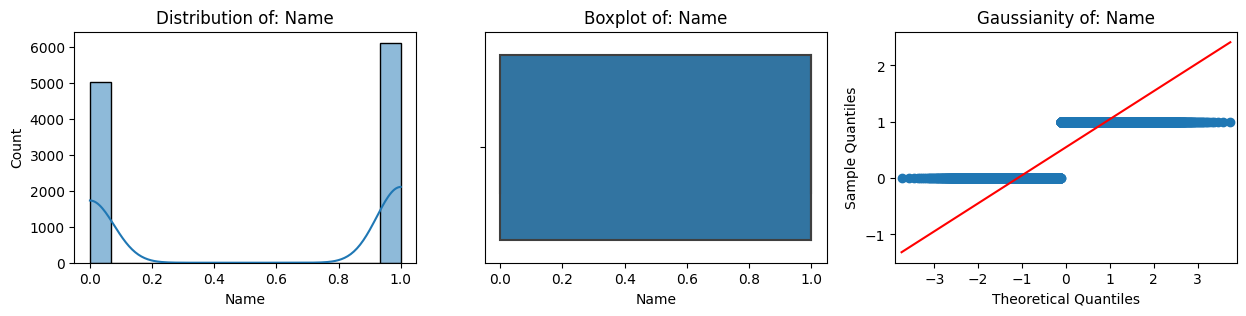

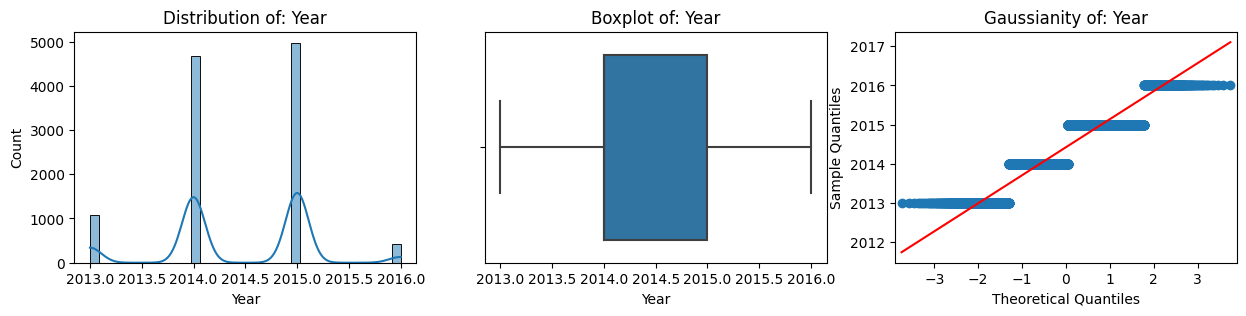

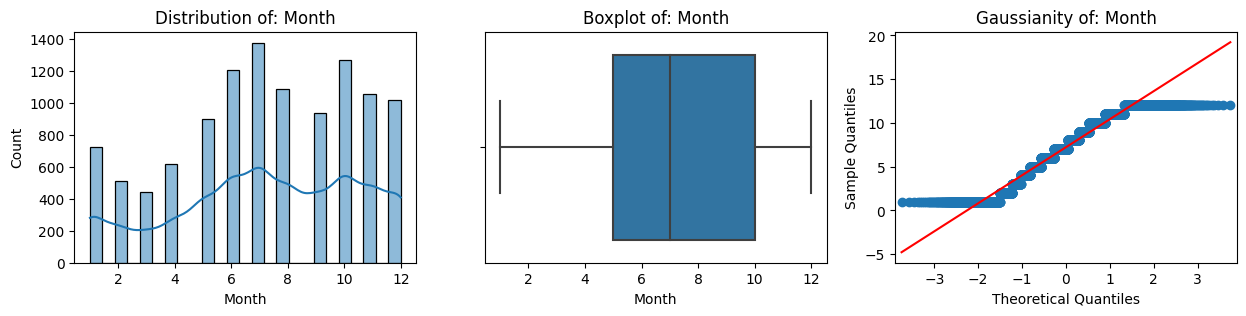

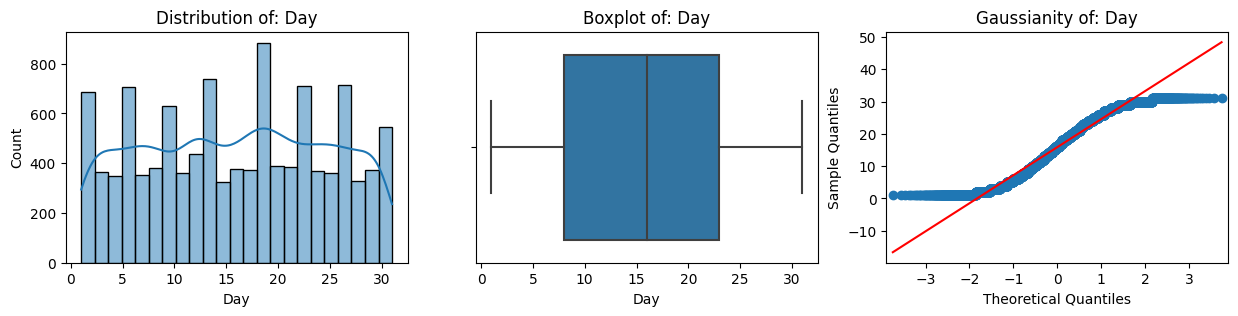

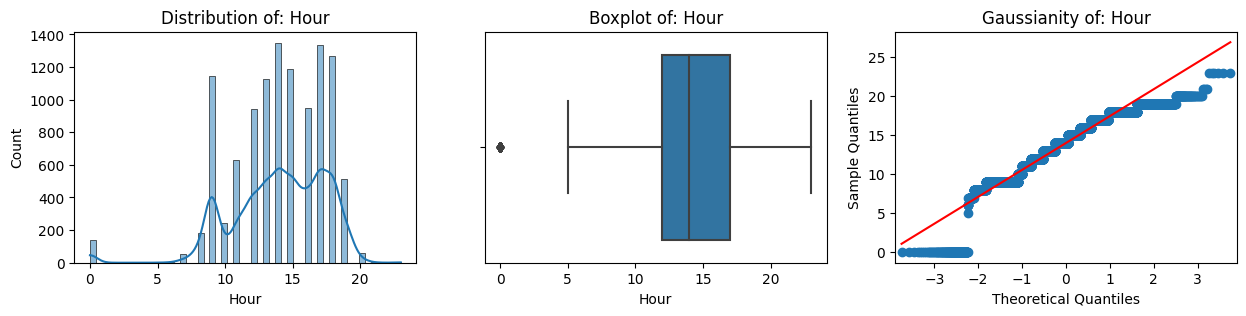

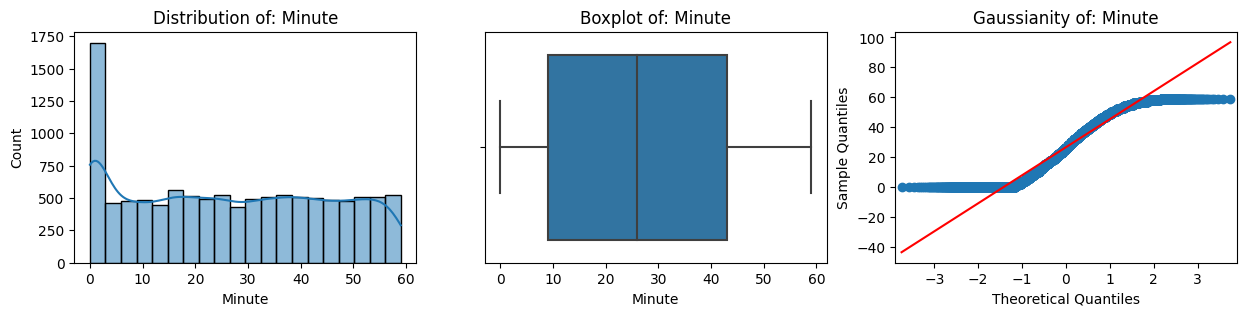

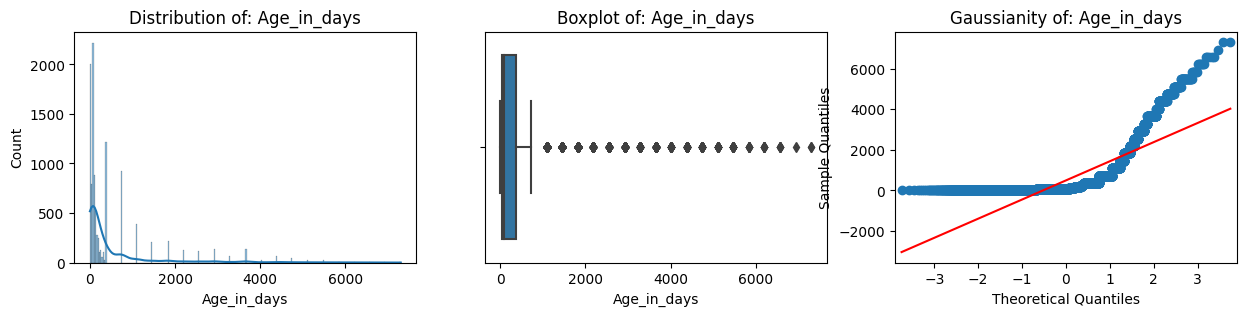

In [46]:
for numerical_feature in cat_train_num.columns:
    
    # Creating three subplots per numerical_feature
    fig, ax =plt.subplots(1,3,figsize=(15,3))
    
    # Histogram to get an overview of the distribution of each numerical_feature
    ax[0].set_title(f"Distribution of: {numerical_feature}")
    sns.histplot(data = cat_train_num, x = numerical_feature, kde=True, ax = ax[0])
    
    # Boxplot to detect outliers
    ax[1].set_title(f"Boxplot of: {numerical_feature}")
    sns.boxplot(data = cat_train_num, x = numerical_feature, ax=ax[1])
    
    # Analyzing whether a feature is normally distributed or not
    ax[2].set_title(f"Gaussianity of: {numerical_feature}")
    qqplot(cat_train_num[numerical_feature],line='s',ax=ax[2]);

In [47]:
features_robust = ['Age_in_days']
features_standard = ['Month', 'Day', 'Hour', 'Minute']
features_minmax = ['Name', 'Year']

In [48]:
feature_already_scaled = []

⚖️ Let's use a ColumnTransformer that we will simply name scalers to use three different scalers on the numerical features to be scaled:

In [49]:
scalers = ColumnTransformer(
                                [
                                    ("robust_scaler", RobustScaler(), features_robust),
                                    ("standard_scaler", StandardScaler(), features_standard),
                                    ("minmax_scaler", MinMaxScaler(), features_minmax)
                                ]).set_output(transform="pandas")

scalers

ColumnTransformer(transformers=[('robust_scaler', RobustScaler(),
                                 ['Age_in_days']),
                                ('standard_scaler', StandardScaler(),
                                 ['Month', 'Day', 'Hour', 'Minute']),
                                ('minmax_scaler', MinMaxScaler(),
                                 ['Name', 'Year'])])

🛠 Now, let's chain a SimpleImputer with this scalers to create a Pipeline called num_transformer

In [50]:
num_transformer = make_pipeline(
                    SimpleImputer(strategy = "median").set_output(transform="pandas"),                    
                    scalers.set_output(transform="pandas")
                ).set_output(transform="pandas")

num_transformer

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('columntransformer',
                 ColumnTransformer(transformers=[('robust_scaler',
                                                  RobustScaler(),
                                                  ['Age_in_days']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['Month', 'Day', 'Hour',
                                                   'Minute']),
                                                 ('minmax_scaler',
                                                  MinMaxScaler(),
                                                  ['Name', 'Year'])]))])

👉 Try to apply this num_transformer on dog_train_num

In [51]:
dog_train_num_scaled = num_transformer.fit_transform(dog_train_num)
dog_train_num_scaled.head()

,robust_scaler__Age_in_days,standard_scaler__Month,standard_scaler__Day,standard_scaler__Hour,standard_scaler__Minute,minmax_scaler__Name,minmax_scaler__Year
0,-0.306723,-1.281045,-0.404971,1.008525,-0.366114,1.0,0.333333
1,0.000000,-1.553119,1.747596,-0.856302,-0.027674,1.0,0.666667
2,0.000000,1.167627,-0.065092,-0.856302,1.326090,0.0,0.000000
3,-0.588235,-0.736896,1.067838,-0.545497,-1.381437,1.0,0.333333
4,-0.487395,-1.281045,-1.311315,0.697721,-0.648149,1.0,0.333333


In [52]:
cat_train_num_scaled = num_transformer.fit_transform(cat_train_num)
cat_train_num_scaled.head()

,robust_scaler__Age_in_days,standard_scaler__Month,standard_scaler__Day,standard_scaler__Hour,standard_scaler__Minute,minmax_scaler__Name,minmax_scaler__Year
0,0.820896,0.864863,-0.330547,-0.582767,0.930465,1.0,0.000000
1,-0.205970,-0.071848,-0.560754,1.445170,-0.935522,0.0,0.333333
2,-0.205970,-1.320795,1.396003,-0.293062,-0.828894,1.0,0.666667
3,-0.205970,-1.008558,1.626210,0.865759,-1.308719,0.0,0.666667
4,1.910448,1.489336,-1.251374,0.286349,1.250349,0.0,0.000000


## 🔠 Categorical features

In [53]:
dog_train_cat = dog_train.select_dtypes(include='object')
cat_train_cat = cat_train.select_dtypes(include='object')

In [54]:
cat_features = list(dog_train_cat.columns)

❓ Check how many columns you would end up with, if you decide to One Hot Encode them all. Is it a reasonable number ❓

In [55]:
unique_occurences = {cat_feature:
                                 len(dog_train_cat[cat_feature].value_counts()) 
                                 for cat_feature in dog_train_cat.columns}

unique_occurences

{'Breed': 2, 'Color': 165, 'Sex': 3, 'Neutered': 4}

In [56]:
unique_occurences = pd.DataFrame.from_dict(unique_occurences,
                                                       orient = "index",
                                                       columns = ["unique_occurences"])

unique_occurences = unique_occurences.sort_values(by = "unique_occurences",
                                                  ascending = False)

In [57]:
multiple_cat = list(unique_occurences[unique_occurences.unique_occurences > 2].index)
multiple_cat

['Color', 'Neutered', 'Sex']

In [58]:
binary_cat = list(unique_occurences[unique_occurences.unique_occurences <= 2].index)
binary_cat

['Breed']

In [59]:
columns_generated_by_multiple_ohe = unique_occurences.loc[multiple_cat].sum()[0]
columns_generated_by_binary_ohe = len(binary_cat)
columns_ohe = columns_generated_by_multiple_ohe + columns_generated_by_binary_ohe
print(f"If we are to One-Hot-Encode all the categorical columns of this cars' dataset,")
print(f"we will generate {columns_generated_by_multiple_ohe} + {columns_generated_by_binary_ohe} = {columns_ohe} columns")

If we are to One-Hot-Encode all the categorical columns of this cars' dataset,
we will generate 172 + 1 = 173 columns




❓ Create a cat_transformer pipeline to deal with categorical features ❓

In [60]:
cat_transformer = make_pipeline(
                    SimpleImputer(strategy = "most_frequent").set_output(transform="pandas"),
                    OneHotEncoder(sparse_output = False, handle_unknown = "ignore", drop='if_binary').set_output(transform="pandas")
                ).set_output(transform="pandas")

cat_transformer

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(drop='if_binary', handle_unknown='ignore',
                               sparse_output=False))])



👉 Try to _fittransform this cat_transformer on dog_train_cat

In [61]:
dog_train_cat_encoded = pd.DataFrame(cat_transformer.fit_transform(dog_train_cat),)
dog_train_cat_encoded

,Breed_Not,Color_Apricot,Color_Apricot/Brown,Color_Apricot/White,Color_Black,Color_Black/Black,Color_Black/Blue,Color_Black/Brown,Color_Black/Buff,Color_Black/Cream,...,Color_Yellow/Black,Color_Yellow/White,Color_Yellow/Yellow,Sex_Female,Sex_Male,Sex_Unknown,Neutered_Intact,Neutered_Neutered,Neutered_Spayed,Neutered_Unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
15591,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
15592,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
15593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [62]:
cat_train_cat_encoded = pd.DataFrame(cat_transformer.fit_transform(cat_train_cat),)
cat_train_cat_encoded

,Breed_Not,Color_Agouti,Color_Agouti/Brown,Color_Black,Color_Black/Black,Color_Black/Brown,Color_Black/Chocolate,Color_Black/Gray,Color_Black/Orange,Color_Black/Silver,...,Color_White/Orange,Color_White/White,Color_White/Yellow,Sex_Female,Sex_Male,Sex_Unknown,Neutered_Intact,Neutered_Neutered,Neutered_Spayed,Neutered_Unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
11130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
11131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
11132,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## 🅿️ Full processor



❓ Create the preprocessor which combines the num_transformer and the cat_transformer ❓


In [63]:
preprocessor = ColumnTransformer([
                    ("num_transformer", num_transformer, make_column_selector(dtype_include = ["float64","int64"])),
                    ("cat_transformer", cat_transformer, make_column_selector(dtype_include = "object"))
                    ]).set_output(transform="pandas")
                

preprocessor

ColumnTransformer(transformers=[('num_transformer',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('columntransformer',
                                                  ColumnTransformer(transformers=[('robust_scaler',
                                                                                   RobustScaler(),
                                                                                   ['Age_in_days']),
                                                                                  ('standard_scaler',
                                                                                   StandardScaler(),
                                                                                   ['Month',
                                                                                    'Day',
                                                                                    'Hour',
                                                                                    'Minute']),
                                                                                  ('minmax_scaler',
                                                                                   MinMaxScaler(),
                                                                                   ['Name',
                                                                                    'Year'])]))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa28cc7cdf0>),
                                ('cat_transformer',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa28cc7ca90>)])



❓ Try to _fittransform the full preprocessor on dog_train to make sure your full pipeline works properly ❓


In [64]:
fully_preprocessed_dog_train = preprocessor.fit_transform(dog_train)
fully_preprocessed_dog_train

,num_transformer__robust_scaler__Age_in_days,num_transformer__standard_scaler__Month,num_transformer__standard_scaler__Day,num_transformer__standard_scaler__Hour,num_transformer__standard_scaler__Minute,num_transformer__minmax_scaler__Name,num_transformer__minmax_scaler__Year,cat_transformer__Breed_Not,cat_transformer__Color_Apricot,cat_transformer__Color_Apricot/Brown,...,cat_transformer__Color_Yellow/Black,cat_transformer__Color_Yellow/White,cat_transformer__Color_Yellow/Yellow,cat_transformer__Sex_Female,cat_transformer__Sex_Male,cat_transformer__Sex_Unknown,cat_transformer__Neutered_Intact,cat_transformer__Neutered_Neutered,cat_transformer__Neutered_Spayed,cat_transformer__Neutered_Unknown
0,-0.306723,-1.281045,-0.404971,1.008525,-0.366114,1.0,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.000000,-1.553119,1.747596,-0.856302,-0.027674,1.0,0.666667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,1.167627,-0.065092,-0.856302,1.326090,0.0,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,-0.588235,-0.736896,1.067838,-0.545497,-1.381437,1.0,0.333333,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.487395,-1.281045,-1.311315,0.697721,-0.648149,1.0,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15590,-0.563025,-0.464821,-1.537901,1.940939,-1.381437,1.0,0.666667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
15591,2.147059,-0.192746,1.634303,0.697721,0.310767,1.0,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
15592,-0.563025,-0.736896,1.407717,-0.234693,-0.140487,0.0,0.666667,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
15593,1.226891,-1.553119,1.521010,1.008525,1.326090,1.0,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [65]:
fully_preprocessed_cat_train = preprocessor.fit_transform(cat_train)
fully_preprocessed_cat_train

,num_transformer__robust_scaler__Age_in_days,num_transformer__standard_scaler__Month,num_transformer__standard_scaler__Day,num_transformer__standard_scaler__Hour,num_transformer__standard_scaler__Minute,num_transformer__minmax_scaler__Name,num_transformer__minmax_scaler__Year,cat_transformer__Breed_Not,cat_transformer__Color_Agouti,cat_transformer__Color_Agouti/Brown,...,cat_transformer__Color_White/Orange,cat_transformer__Color_White/White,cat_transformer__Color_White/Yellow,cat_transformer__Sex_Female,cat_transformer__Sex_Male,cat_transformer__Sex_Unknown,cat_transformer__Neutered_Intact,cat_transformer__Neutered_Neutered,cat_transformer__Neutered_Spayed,cat_transformer__Neutered_Unknown
0,0.820896,0.864863,-0.330547,-0.582767,0.930465,1.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.205970,-0.071848,-0.560754,1.445170,-0.935522,0.0,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,-0.205970,-1.320795,1.396003,-0.293062,-0.828894,1.0,0.666667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,-0.205970,-1.008558,1.626210,0.865759,-1.308719,0.0,0.666667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.910448,1.489336,-1.251374,0.286349,1.250349,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11129,0.179104,0.240389,1.741313,-1.451883,-1.415347,0.0,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
11130,-0.179104,-0.696321,-0.215444,-0.872472,1.570232,0.0,0.666667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
11131,0.000000,-1.945268,0.475176,1.155465,1.730174,0.0,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
11132,-0.185075,-1.008558,1.280900,-0.582767,-0.242441,0.0,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


# 🚀 Full pipeline with classification model

In [66]:
def dog_classification_models(preprocessor, classification_model):
    piped_classifior = make_pipeline(preprocessor, classification_model)
    return piped_classifior

In [67]:
def cat_classification_models(preprocessor, classification_model):
    piped_classifior = make_pipeline(preprocessor, classification_model)
    return piped_classifior

In [68]:
# Here is an example of a pipelined regressor

from sklearn.svm import LinearSVC

In [69]:
models = [
    LinearSVC(),
    LogisticRegression(),
    BernoulliNB(),
    Perceptron(),
    SGDClassifier(),
    PassiveAggressiveClassifier(),
    MLPClassifier(),
    KNeighborsClassifier(),
    SVC()
]

In [70]:
models_names = [
    'linearSVC',
    'logistic_regression',
    'naive_bayes_Bern',
    'perceptron',
    'sgd_class',
    'pass_aggr_class',
    'mlp_class',
    'kneigh_class',
    'SVC'
]

In [71]:
%%time

X_dog_train, X_dog_test, y_dog_train, y_dog_test = train_test_split(dog_train, y_dog)

different_test_scores_dog = []

for model_name, model in zip(models_names, models):

    temp_piped_regressor = dog_classification_models(preprocessor, model)
    temp_piped_regressor.fit(X_dog_train, y_dog_train)
    different_test_scores_dog.append(temp_piped_regressor.score(X_dog_test, y_dog_test))
    

comparing_dog_classification_models = pd.DataFrame(list(zip(models_names, different_test_scores_dog)),
                                                columns =['model_name', 'test_score'])

round(comparing_dog_classification_models.sort_values(by = "test_score", ascending = False),2)

/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _chec

CPU times: user 4min 50s, sys: 10min 38s, total: 15min 29s
Wall time: 1min 53s


,model_name,test_score
8,SVC,0.58
1,logistic_regression,0.57
0,linearSVC,0.56
2,naive_bayes_Bern,0.56
4,sgd_class,0.56
6,mlp_class,0.54
7,kneigh_class,0.53
5,pass_aggr_class,0.48
3,perceptron,0.43


In [ ]:
%%time

X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(cat_train, y_cat)

different_test_scores_cat = []

for model_name, model in zip(models_names, models):

    temp_piped_regressor = cat_classification_models(preprocessor, model)
    temp_piped_regressor.fit(X_cat_train, y_cat_train)
    different_test_scores_cat.append(temp_piped_regressor.score(X_cat_test, y_cat_test))
    

comparing_cat_classification_models = pd.DataFrame(list(zip(models_names, different_test_scores_cat)),
                                                columns =['model_name', 'test_score'])

round(comparing_cat_classification_models.sort_values(by = "test_score", ascending = False),2)

/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _chec

In [ ]:
%%time

different_test_scores_cv = []

for model_name, model in zip(models_names, models):

    temp_piped_regressor = dog_classification_models(preprocessor, model)
    different_test_scores_cv.append(cross_val_score(temp_piped_regressor, dog_train, y_dog).mean())

comparing_animals_classification_models_cv = pd.DataFrame(list(zip(models_names, different_test_scores_dog)),
                                                columns = ['model_name', 'cross_val_score'])

round(comparing_animals_classification_models_cv.sort_values(by = "cross_val_score", ascending = False),2)

In [ ]:
%%time

different_test_scores_cv = []

for model_name, model in zip(models_names, models):

    temp_piped_regressor = cat_classification_models(preprocessor, model)
    different_test_scores_cv.append(cross_val_score(temp_piped_regressor, cat_train, y_cat).mean())

comparing_animals_classification_models_cv = pd.DataFrame(list(zip(models_names, different_test_scores_cat)),
                                                columns = ['model_name', 'cross_val_score'])

round(comparing_animals_classification_models_cv.sort_values(by = "cross_val_score", ascending = False),2)

We can see that SVC is the best classifier model for both dogs and cats.

# 📳 Do prediction

In [ ]:
fully_preprocessed_dog_test = preprocessor.fit_transform(dog_test)
fully_preprocessed_cat_test = preprocessor.fit_transform(cat_test)

In [ ]:
dog_classifier = SVC()
dog_classifier.fit(fully_preprocessed_dog_train, y_dog)

In [ ]:
y_dog_predict = dog_classifier.predict(fully_preprocessed_dog_test)
y_dog_predict

In [ ]:
train_dogs